In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
tf.__version__

'2.17.0'

In [2]:
data = pd.read_excel("E:\project\AI_ML\Dataset_master.xlsx",sheet_name = "American Express User Exit Pred" )
data

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ysgup\AppData\Local\Temp\ipykernel_25476\149148586.py:1: SyntaxWarning: invalid escape sequence '\p'
  data = pd.read_excel("E:\project\AI_ML\Dataset_master.xlsx",sheet_name = "American Express User Exit Pred" )


,Credit Score,Geography,Gender,Age,Customer Since,Current Account,Num of products,UPI Enabled,Estimated Yearly Income,Closed
0,553,Delhi,Female,45,4,0.000000e+00,4,1,274150,0
1,447,Bengaluru,Male,31,7,0.000000e+00,4,1,519360,0
2,501,Delhi,Female,32,2,0.000000e+00,4,1,545501,0
3,428,Delhi,Male,51,3,0.000000e+00,4,1,86868,0
4,492,Delhi,Female,57,6,1.912682e+06,2,1,518680,0
...,...,...,...,...,...,...,...,...,...,...
9922,594,Bengaluru,Male,28,6,0.000000e+00,4,1,394810,0
9923,557,Bengaluru,Male,59,3,8.050490e+05,2,0,58163,1
9924,627,Mumbai,Female,42,4,1.893594e+06,4,0,494067,0
9925,600,Bengaluru,Female,51,0,9.031778e+05,2,1,109375,1


In [3]:
X  = data.drop("Closed",axis = 1).values
y  = data["Closed"].values
X

array([[553, 'Delhi', 'Female', ..., 4, 1, 274150],
       [447, 'Bengaluru', 'Male', ..., 4, 1, 519360],
       [501, 'Delhi', 'Female', ..., 4, 1, 545501],
       ...,
       [627, 'Mumbai', 'Female', ..., 4, 0, 494067],
       [600, 'Bengaluru', 'Female', ..., 2, 1, 109375],
       [553, 'Delhi', 'Male', ..., 4, 1, 180031]], dtype=object)

In [4]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [6]:
X

array([[553, 'Delhi', 0, ..., 4, 1, 274150],
       [447, 'Bengaluru', 1, ..., 4, 1, 519360],
       [501, 'Delhi', 0, ..., 4, 1, 545501],
       ...,
       [627, 'Mumbai', 0, ..., 4, 0, 494067],
       [600, 'Bengaluru', 0, ..., 2, 1, 109375],
       [553, 'Delhi', 1, ..., 4, 1, 180031]], dtype=object)

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder' ,OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 0.0, ..., 4, 1, 274150],
       [1.0, 0.0, 0.0, ..., 4, 1, 519360],
       [0.0, 1.0, 0.0, ..., 4, 1, 545501],
       ...,
       [0.0, 0.0, 1.0, ..., 4, 0, 494067],
       [1.0, 0.0, 0.0, ..., 2, 1, 109375],
       [0.0, 1.0, 0.0, ..., 4, 1, 180031]], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train ,y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [9]:
y_train

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [11]:
X_train

array([[ 0.99434917, -0.57109746, -0.5792406 , ...,  0.90580857,
         0.65086753, -0.06854301],
       [-1.00568294, -0.57109746,  1.72639831, ...,  0.90580857,
         0.65086753,  0.34018176],
       [ 0.99434917, -0.57109746, -0.5792406 , ..., -0.951175  ,
        -1.53641095, -0.67326188],
       ...,
       [-1.00568294, -0.57109746,  1.72639831, ..., -0.951175  ,
         0.65086753, -0.17067658],
       [-1.00568294, -0.57109746,  1.72639831, ..., -0.951175  ,
         0.65086753,  1.4232319 ],
       [ 0.99434917, -0.57109746, -0.5792406 , ..., -0.951175  ,
        -1.53641095, -1.67963883]])

In [18]:
ann = tf.keras.models.Sequential()

In [43]:
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))

In [44]:
ann.add(tf.keras.layers.Dense(units = 5, activation = 'relu'))


In [45]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [46]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
ann.fit(X_train,y_train, batch_size=32, epochs=120)

Epoch 1/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7164 - loss: 0.6760
Epoch 2/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8032 - loss: 0.6143
Epoch 3/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.5711
Epoch 4/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8210 - loss: 0.5275
Epoch 5/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8214 - loss: 0.4727
Epoch 6/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8219 - loss: 0.4684
Epoch 7/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8136 - loss: 0.4798
Epoch 8/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8126 - loss: 0.4813
Epoch 9/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8157 - loss: 0.4770
Epoch 10/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8177 - loss: 0.4728
Epoch 11/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8169 - loss: 0.4741
Epoch 12/120
249/249 ━━━━━━━━━━━━━━━━━━━━

In [48]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [49]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[0, 1],
       [0, 0],
       [0, 0],
       ...,
       [0, 1],
       [0, 0],
       [0, 1]], dtype=int64)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)


0.8217522658610272

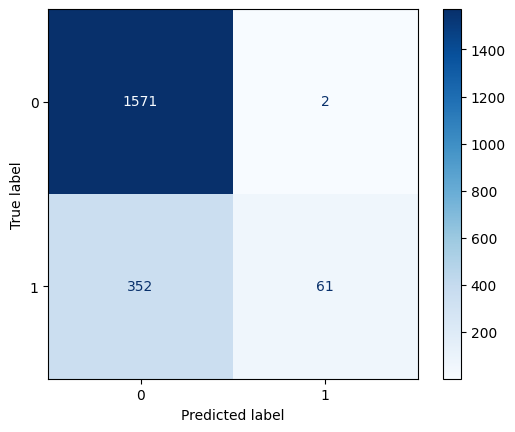

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues) 
plt.show()